# Machine Intelligence II - Team MensaNord
## Sheet 11

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [2]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np
import math
from scipy.ndimage import imread

### Exercise 1

In [24]:
img_orig = imread('testimg.jpg').flatten()
print("shape: ", img_orig.shape)
print("values: from ", img_orig.min(), " to ", img_orig.max())

img = np.asarray([[0.0 for i in range(img_orig.shape[0])] for i in range(3)])
print(img.shape)

std = [0, 0.05, 0.1]
for i in range(img.shape[1]):
    # normalize => img[0]
    img[0][i] = img_orig[i] / 255
    # gaussian noise => img[1] img[2]
    img[1][i] = img[0][i] + np.random.normal(0, std[1])
    img[2][i] = img[0][i] + np.random.normal(0, std[2])
    
print(img[:, 0:3])

shape:  (177500,)
values: from  0  to  255
(3, 177500)


[[ 0.63529412  0.63137255  0.62745098]
 [ 0.63322632  0.64761074  0.7188427 ]
 [ 0.713355    0.57513524  0.63155643]]


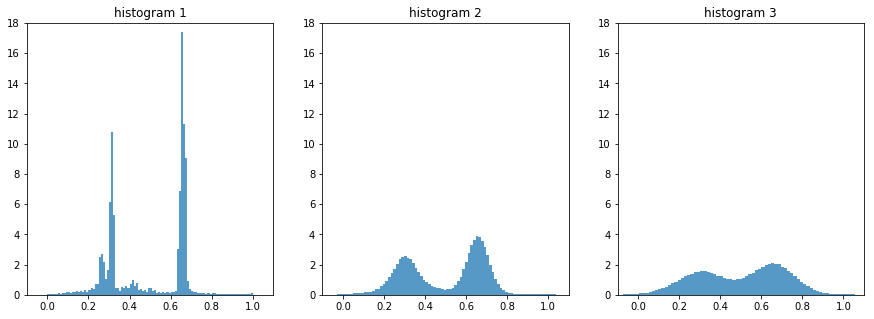

In [37]:
# histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.hist(img[i], 100, normed=1, alpha=0.75)
    plt.xlim(-0.1, 1.1)
    plt.ylim(0, 18)
    plt.title('histogram {}'.format(i+1))

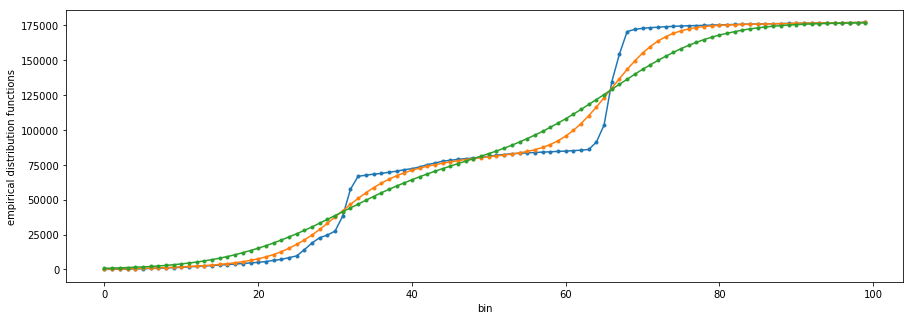

In [117]:
nbins = 100
bins = np.linspace(0, 1, nbins+1)

elementsPerBin = np.asarray([[0 for i in range(nbins)] for i in range(3)])
for i in range(3):
    ind = np.digitize(img[i], bins)
    # print("minmax: ", ind.min(), ind.max())
    elementsPerBin[i] = [len(img[i][ind == j]) for j in range(nbins)]
    if nbins <= 20:
        print(elementsPerBin[i], "\n")        
        
sumUptoBinX = np.asarray([[0 for i in range(nbins)] for i in range(3)])
for i in range(3):
    for j in range(nbins):
        sumUptoBinX[i][j] = np.sum(elementsPerBin[i][0:j+1])
    if nbins <= 20:
        print(sumUptoBinX[i], "\n")
        
#TODO? /= bin width    
    
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot(sumUptoBinX[i], '.-')
plt.xlabel('bin')
plt.ylabel('empirical distribution functions')